## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train
.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [2]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

## 讀入資料

In [15]:
data = pd.read_csv("Titanic_train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [16]:
#計算每一行是否有遺失值，計算遺失比例
missing_vals = data.isnull().sum()/len(data)
missing_vals.sort_values(ascending=False)
missing_vals = pd.DataFrame(missing_vals, columns=['missing_rate'])
print(missing_vals)

             missing_rate
PassengerId      0.000000
Survived         0.000000
Pclass           0.000000
Name             0.000000
Sex              0.000000
Age              0.198653
SibSp            0.000000
Parch            0.000000
Ticket           0.000000
Fare             0.000000
Cabin            0.771044
Embarked         0.002245


In [20]:
# 細看遺失資料的樣態
missing_index= data.isnull()   
display(data[missing_index.values==True])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,2,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,2,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,6,0,2,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
5,6,0,2,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,2,"Rice, Mrs. William (Margaret Norton)",0,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,1,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
888,889,0,2,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
888,889,0,2,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S


## 觀察 Age

# step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?

29.69911764705882
14.526497332334044


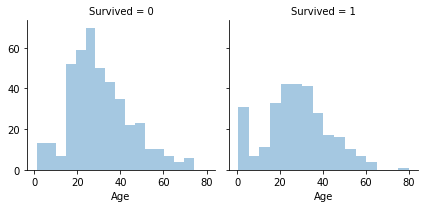

In [8]:
print(data['Age'].mean()) #age平均
print(data['Age'].std()) #age標準差
# 連續型用分布圖行來看
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

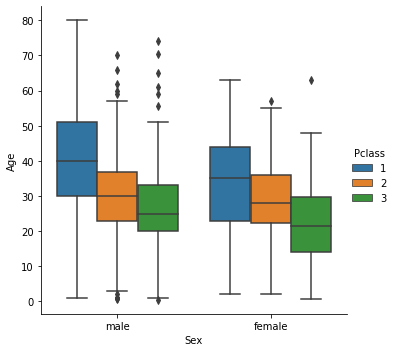

In [10]:
g = sns.catplot( x ="Sex" , y = "Age" , hue = "Pclass" ,
                data = data, kind = "box")
g

# step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。

In [18]:

#轉型 
#透過 preprocessing 轉換
from sklearn import preprocessing
#下面兩行程式，讓 Male = 1, FeMale = 0.
le = preprocessing.LabelEncoder()
data['Pclass']=le.fit_transform(data['Pclass'])
data["Sex"] = le.fit_transform(data["Sex"])
x = ['Sex','Age','Pclass']
y = data[x]

# KNN
#設定用多少鄰居資訊來補值
value_neighbors=1
from sklearn.impute import KNNImputer
#進行 KNN的一些設定
imputer = KNNImputer(n_neighbors = value_neighbors)
#把資料放進去，進行補值
df_filled = pd.DataFrame(imputer.fit_transform(y))

#只呈現有遺失值的資料
display(y[missing_index.values==True])

#只呈現有遺失值的資料-呈現補值的結果
display(df_filled[missing_index.values==True])


,Sex,Age,Pclass
0,1,22.0,2
2,0,26.0,2
4,1,35.0,2
5,1,NaN,2
5,1,NaN,2
...,...,...,...
885,0,39.0,2
886,1,27.0,1
888,0,NaN,2
888,0,NaN,2


,0,1,2
0,1.0,22.0,2.0
2,0.0,26.0,2.0
4,1.0,35.0,2.0
5,1.0,22.0,2.0
5,1.0,22.0,2.0
...,...,...,...
885,0.0,39.0,2.0
886,1.0,27.0,1.0
888,0.0,26.0,2.0
888,0.0,26.0,2.0
